# Vérification du terme source de décroissance radioactive

In [1]:
from trustutils import run  

run.introduction("Y.G.")

## Introduction 
 Validation made by : Y.G.



 Report generated 27/01/2022

### Description

Le domaine d'application visé est la modélisation de l'évolution des précurseurs de neutrons retardés dans un calcul couplé avec un code de neutronique. En particulier, les précurseurs sont transportés dans les réacteurs à sels fondus. La distribution spatiale de la concentration en précurseurs (séparés en groupes associés à une constante de décroissance radioactive différente) est résolue entièrement dans TRUST via une équation de converction diffusion de la concentration : \begin{equation} \partial_t c + \nabla\cdot( u c) - \nabla\cdot\left(D_\text{eff}\nabla c\right) = {\color{red}{-\lambda c}} + \text{Prod} \end{equation}

Ce terme peut être implémenté via source_constituant et champ_fonc_fonction, mais ne pourra pas être implicité, s'exposant ainsi à de potentielles instabilités.
Le terme source radioactive_decay permet d'impliciter ce terme. Pour vérifier l'implémentation on néglige les termes de convection et de diffusion : \latex_(\begin{equation} \partial_t c = {\color{red}{-\lambda c}} + \text{Prod} \end{equation}
La solution de cette équation est : \latex_(\begin{equation} c = \frac{\text{Prod}}{\lambda} (e^{-\lambda t} - 1) \end{equation}

In [2]:
run.TRUST_parameters("1.8.0")

### TRUST parameters 
 * Version TRUST: 1.8.0
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/radioactive_decay/build)

In [3]:
from trustutils import run  

run.reset()

run.addCase("VEFPreP1B/dt0.1","decay.data")  
run.addCase("VEFPreP1B/dt1"  ,"decay.data")  
run.addCase("VEFPreP1B/dt0.1","source_constituant.data")  
run.addCase("VEFPreP1B/dt1"  ,"source_constituant.data")  

run.addCase("PolyMAC/dt0.1","decay.data")  
run.addCase("PolyMAC/dt1"  ,"decay.data")  
run.addCase("PolyMAC/dt0.1","source_constituant.data")  
run.addCase("PolyMAC/dt1"  ,"source_constituant.data")

run.addCase("CoviMAC/dt0.1","decay.data")  
run.addCase("CoviMAC/dt1"  ,"decay.data")  
run.addCase("CoviMAC/dt0.1","source_constituant.data")  
run.addCase("CoviMAC/dt1"  ,"source_constituant.data")   
run.printCases()
run.runCases()

### Test cases 
* VEFPreP1B/dt0.1/decay.data : 
* VEFPreP1B/dt1/decay.data : 
* VEFPreP1B/dt0.1/source_constituant.data : 
* VEFPreP1B/dt1/source_constituant.data : 
* PolyMAC/dt0.1/decay.data : 
* PolyMAC/dt1/decay.data : 
* PolyMAC/dt0.1/source_constituant.data : 
* PolyMAC/dt1/source_constituant.data : 
* CoviMAC/dt0.1/decay.data : 
* CoviMAC/dt1/decay.data : 
* CoviMAC/dt0.1/source_constituant.data : 
* CoviMAC/dt1/source_constituant.data : 


Running **with Sserver**...
  => A total of 12 cases were (successfully) run in 1.0s.


## Comparaisons a une solution de reference 
### Comparaison

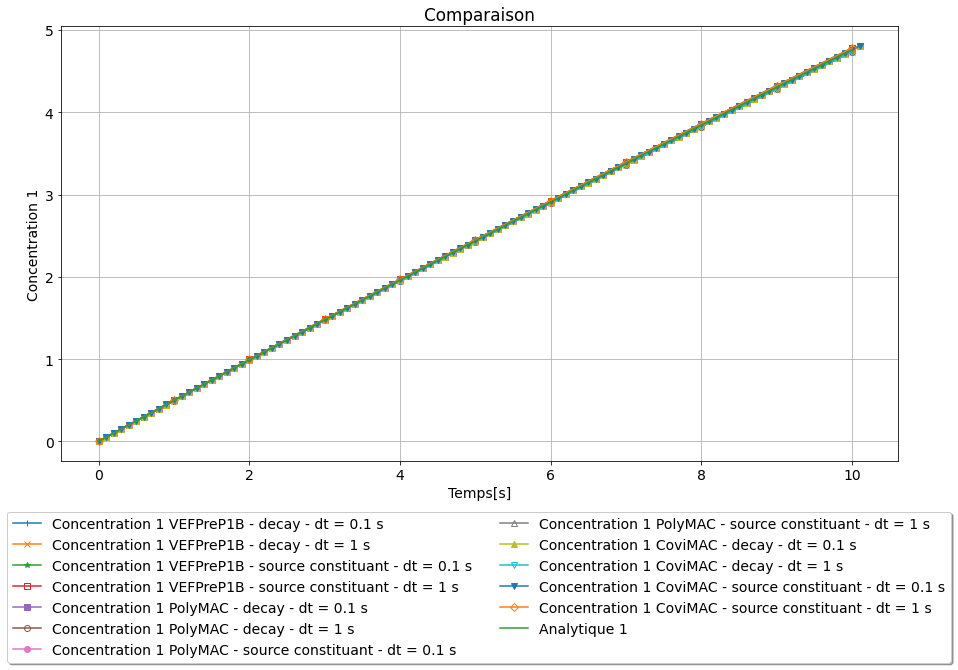

In [4]:
from trustutils import plot
import numpy as np

a = plot.Graph("Comparaison",size=[15,8])

a.addPoint("VEFPreP1B/dt0.1/decay_C.son",label="Concentration 1 VEFPreP1B - decay - dt = 0.1 s",marker='-|')
a.addPoint("VEFPreP1B/dt1/decay_C.son",label="Concentration 1 VEFPreP1B - decay - dt = 1 s",marker='-x')

a.addPoint("PolyMAC/dt0.1/source_constituant_C.son",label="Concentration 1 VEFPreP1B - source constituant - dt = 0.1 s",marker='-*')
a.addPoint("PolyMAC/dt1/source_constituant_C.son",label="Concentration 1 VEFPreP1B - source constituant - dt = 1 s",marker='-s',markerfacecolor="None")

a.addPoint("PolyMAC/dt0.1/decay_C.son",label="Concentration 1 PolyMAC - decay - dt = 0.1 s",marker="-s")
a.addPoint("PolyMAC/dt1/decay_C.son",label="Concentration 1 PolyMAC - decay - dt = 1 s",marker='-o',markerfacecolor="None")

a.addPoint("PolyMAC/dt0.1/source_constituant_C.son",label="Concentration 1 PolyMAC - source constituant - dt = 0.1 s",marker="-o")
a.addPoint("PolyMAC/dt1/source_constituant_C.son",label="Concentration 1 PolyMAC - source constituant - dt = 1 s",marker='-^',markerfacecolor="None")

a.addPoint("CoviMAC/dt0.1/decay_C.son",label="Concentration 1 CoviMAC - decay - dt = 0.1 s",marker="-^")
a.addPoint("CoviMAC/dt1/decay_C.son",label="Concentration 1 CoviMAC - decay - dt = 1 s",marker='-v',markerfacecolor="None")

a.addPoint("CoviMAC/dt0.1/source_constituant_C.son",label="Concentration 1 CoviMAC - source constituant - dt = 0.1 s",marker="-v")
a.addPoint("CoviMAC/dt1/source_constituant_C.son",label="Concentration 1 CoviMAC - source constituant - dt = 1 s",marker='-D',markerfacecolor="None")

x = np.linspace(0,10,100)
y=-0.5/0.01*(np.exp(-0.01*x)-1) 
a.add(x,y,label="Analytique 1")   

a.label("Temps[s]","Concentration 1")
a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)

a.visu()

## Comparaison

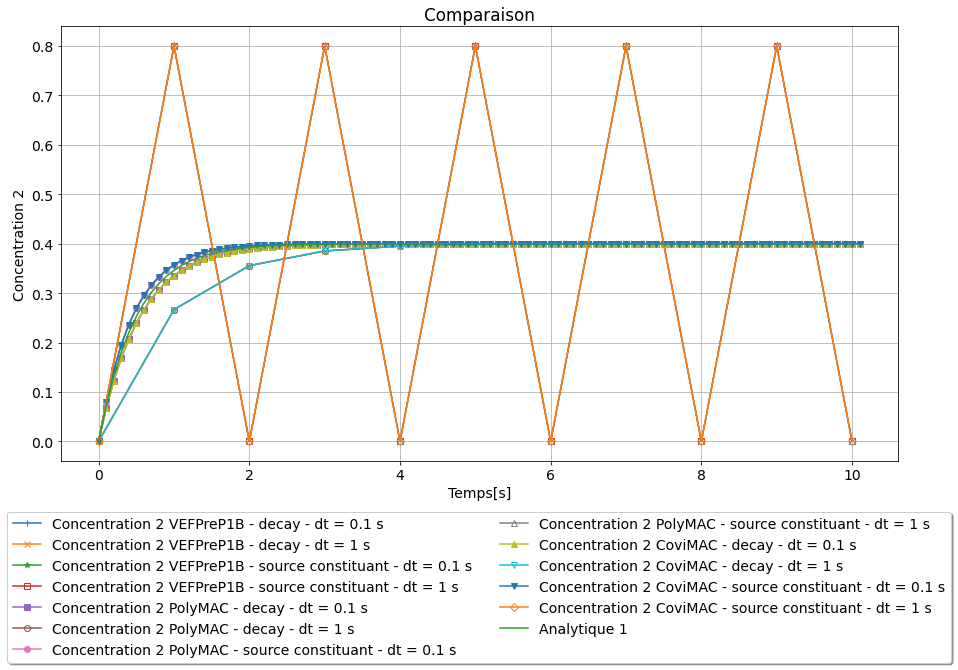

In [5]:
from trustutils import plot
import numpy as np

a = plot.Graph("Comparaison",size=[15,8])

a.addPoint("VEFPreP1B/dt0.1/decay_C.son",var="y",label="Concentration 2 VEFPreP1B - decay - dt = 0.1 s",marker='-|')
a.addPoint("VEFPreP1B/dt1/decay_C.son",var="y",label="Concentration 2 VEFPreP1B - decay - dt = 1 s",marker='-x')

a.addPoint("PolyMAC/dt0.1/source_constituant_C.son",var="y",label="Concentration 2 VEFPreP1B - source constituant - dt = 0.1 s",marker='-*')
a.addPoint("PolyMAC/dt1/source_constituant_C.son",var="y",label="Concentration 2 VEFPreP1B - source constituant - dt = 1 s",marker='-s',markerfacecolor="None")

a.addPoint("PolyMAC/dt0.1/decay_C.son",var="y",label="Concentration 2 PolyMAC - decay - dt = 0.1 s",marker="-s")
a.addPoint("PolyMAC/dt1/decay_C.son",var="y",label="Concentration 2 PolyMAC - decay - dt = 1 s",marker='-o',markerfacecolor="None")

a.addPoint("PolyMAC/dt0.1/source_constituant_C.son",var="y",label="Concentration 2 PolyMAC - source constituant - dt = 0.1 s",marker="-o")
a.addPoint("PolyMAC/dt1/source_constituant_C.son",var="y",label="Concentration 2 PolyMAC - source constituant - dt = 1 s",marker='-^',markerfacecolor="None")

a.addPoint("CoviMAC/dt0.1/decay_C.son",var="y",label="Concentration 2 CoviMAC - decay - dt = 0.1 s",marker="-^")
a.addPoint("CoviMAC/dt1/decay_C.son",var="y",label="Concentration 2 CoviMAC - decay - dt = 1 s",marker='-v',markerfacecolor="None")

a.addPoint("CoviMAC/dt0.1/source_constituant_C.son",var="y",label="Concentration 2 CoviMAC - source constituant - dt = 0.1 s",marker="-v")
a.addPoint("CoviMAC/dt1/source_constituant_C.son",var="y",label="Concentration 2 CoviMAC - source constituant - dt = 1 s",marker='-D',markerfacecolor="None")

x = np.linspace(0,10,100)
y=-0.8/2.*(np.exp(-2.0*x)-1) 
a.add(x,y,label="Analytique 1")   

a.label("Temps[s]","Concentration 2")
a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)

a.visu()